In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

>Import data and skip the footnotes found in internet use.

In [3]:
net_migration = pd.read_csv("/Users/Justin/Downloads/UNNetMigrationData.csv")
internet_use = pd.read_csv("/Users/Justin/Downloads/UNInternetData.csv", nrows = 4495)

In [4]:
net_migration.head(6)

,Country or Area,Year,Value
0,Afghanistan,2012,473007
1,Afghanistan,2007,-677497
2,Afghanistan,2002,804120
3,Afghanistan,1997,-379474
4,Afghanistan,1992,2227474
5,Afghanistan,1987,-1484185


In [5]:
internet_use.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [6]:
type(net_migration)

pandas.core.frame.DataFrame

In [7]:
type(internet_use)

pandas.core.frame.DataFrame

>Change column names for both dataframes

In [8]:
net_migration.columns = ('Country','Year','Net_Migration')

In [9]:
internet_use.columns = ('Country','Year','Internet_Users_Pct','Extra')

>Deleting footnote reference column

In [10]:
del internet_use['Extra']

>Merging net migration and internet use data based on Country and Year

In [11]:
df = pd.merge(net_migration, internet_use, on=['Country', 'Year'])

In [12]:
df.head(n=5)

,Country,Year,Net_Migration,Internet_Users_Pct
0,Afghanistan,2012,473007,5.454545
1,Afghanistan,2007,-677497,1.900000
2,Afghanistan,2002,804120,0.004561
3,Albania,2012,-91750,54.655959
4,Albania,2007,-252926,15.036115


In [13]:
df.tail(n=5)

,Country,Year,Net_Migration,Internet_Users_Pct
710,Zambia,1997,79445,0.009330
711,Zimbabwe,2012,-219922,17.090000
712,Zimbabwe,2007,-307650,10.850000
713,Zimbabwe,2002,-395554,3.994356
714,Zimbabwe,1997,-200000,0.033080


>Create 3 dataframes based on Year, plus a dataframe containing all 3 years for later.

In [14]:
df_2002 = df.loc[(df.Year == 2002)]
df_2007 = df.loc[(df.Year == 2007)]
df_2012 = df.loc[(df.Year == 2012)]
df_dec = [df_2002, df_2007, df_2012]

>Country with the highest Internet User % in 2002 - Iceland with 79.12%

>Country with the lowest Internet User % in 2002 - Timor-Leste with 0.0%

In [15]:
print(df_2002.sort_values(['Internet_Users_Pct'], ascending = False))

                   Country  Year  Net_Migration  Internet_Users_Pct
296                Iceland  2002           3894           79.120000
481                 Norway  2002          67400           72.840000
616                 Sweden  2002         141723           70.570000
182                Denmark  2002          46306           64.250000
221                Finland  2002          31935           62.430000
126                 Canada  2002        1026702           61.593299
621            Switzerland  2002         186125           61.400000
455            Netherlands  2002         144620           61.290000
464            New Zealand  2002         134629           59.080753
688          United States  2002        5149157           58.785404
683         United Kingdom  2002         968350           56.480000
243                Germany  2002           1217           48.820000
565              Singapore  2002         435595           47.000000
332                  Japan  2002         622058 

>Country with the highest Internet User % in 2007 - Iceland with 90.60%

>Country with the lowest Internet User % in 2007 - Timor-Leste with 0.140959%

In [16]:
print(df_2007.sort_values(['Internet_Users_Pct'], ascending = False))

                  Country  Year  Net_Migration  Internet_Users_Pct
295               Iceland  2007           8041           90.600000
480                Norway  2007         174001           86.930000
454           Netherlands  2007          55674           85.820000
181               Denmark  2007          87989           85.030000
615                Sweden  2007         262453           82.010000
220               Finland  2007          71143           80.780000
377            Luxembourg  2007          42279           78.920000
620           Switzerland  2007         344872           77.200000
242               Germany  2007          31640           75.160000
682        United Kingdom  2007        1523939           75.090000
687         United States  2007        5070253           75.000000
331                 Japan  2007         445267           74.300000
125                Canada  2007        1229905           73.200000
564             Singapore  2007         449245           69.90

>Country with the highest Internet User % in 2012 - Iceland with 96.2098%

>Country with the lowest Internet User % in 2012 - Eritrea with 0.8%

In [17]:
print(df_2012.sort_values(['Internet_Users_Pct'], ascending = False))


                  Country  Year  Net_Migration  Internet_Users_Pct
294               Iceland  2012           -378           96.209800
479                Norway  2012         235665           94.649978
614                Sweden  2012         272626           93.179988
453           Netherlands  2012         110006           92.859992
180               Denmark  2012          96839           92.260012
376            Luxembourg  2012          48704           91.949924
219               Finland  2012         107409           89.879998
44                Bahrain  2012          29915           88.000000
681        United Kingdom  2012         900000           87.479998
619           Switzerland  2012         382267           85.200000
677  United Arab Emirates  2012         405000           84.999992
124                Canada  2012        1175863           83.000000
241               Germany  2012        1249998           82.349998
462           New Zealand  2012           7265           82.00

>Country with the highest Net Migration in 2012 - United States with 5,007,887

>Country with the lowest Net Migration in 2012 - India with -2,598,218

In [18]:
print(df_2012.sort_values(['Net_Migration'], ascending = False))

                  Country  Year  Net_Migration  Internet_Users_Pct
686         United States  2012        5007887           79.300000
662                Turkey  2012        2000003           45.130000
358               Lebanon  2012        1250000           61.249786
241               Germany  2012        1249998           82.349998
484                  Oman  2012        1211000           60.000000
124                Canada  2012        1175863           83.000000
31              Australia  2012        1023107           79.000000
681        United Kingdom  2012         900000           87.479998
545          Saudi Arabia  2012         850000           54.000000
584          South Africa  2012         600000           41.000000
308                  Iraq  2012         548666            7.100000
321                 Italy  2012         528269           55.829998
350                Kuwait  2012         517500           70.450000
0             Afghanistan  2012         473007            5.45

>2002 Scatterplot - Comparing Net Migraiton to % of Internet Users

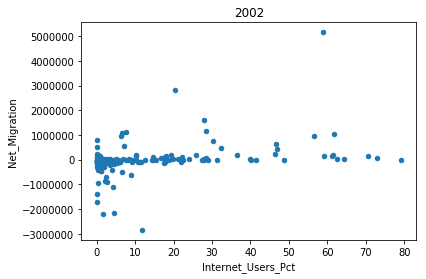

In [19]:
df_2002.plot(kind = 'scatter', x = 'Internet_Users_Pct', y = 'Net_Migration', title = '2002')
plt.show()

>2007 Scatterplot - Comparing Net Migraiton to % of Internet Users

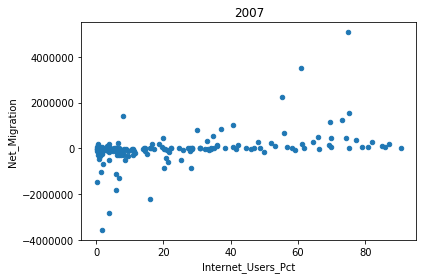

In [20]:
df_2007.plot(kind = 'scatter', x = 'Internet_Users_Pct', y = 'Net_Migration', title = '2007')
plt.show()

>2012 Scatterplot - Comparing Net Migraiton to % of Internet Users

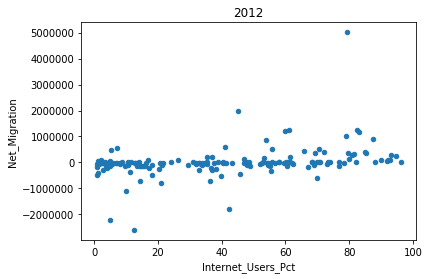

In [21]:
df_2012.plot(kind = 'scatter', x = 'Internet_Users_Pct', y = 'Net_Migration', title = '2012')
plt.show()

>Observations:
>Unsurprisingly, the % of internet users has generally increased from 2002-2012, while net migration has stayed relatively consistent. There's a positive correlation between the % of internet users that a country has and their net migration, seen more directly in 2002 & 2007. In 2012, we're seeing countries with higher % of internet users with negative net migration, which is not seen in the data from 2002 and 2007.

In [22]:
df_internet_2012 = df_2012['Internet_Users_Pct']

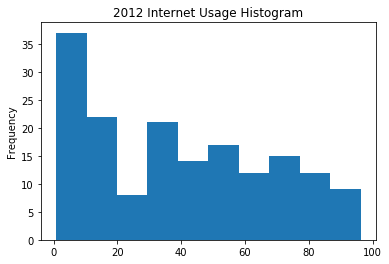

In [23]:
df_internet_2012.plot(x = 'Internet_Users_Pct', kind = 'hist', title = '2012 Internet Usage Histogram', bins=10)

In [24]:
df_migration_2012 = df_2012['Net_Migration']

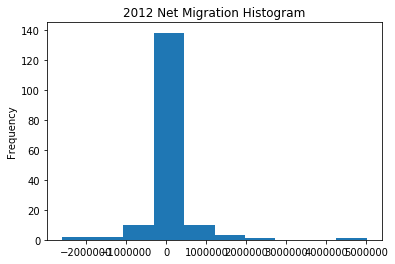

In [25]:
df_migration_2012.plot(x = 'Net_Migration', kind = 'hist', title = '2012 Net Migration Histogram', bins=10)

>The internet usage from 2012 is not unimodal. The mode is close to the minimum value.

>The net migration is unimodal. When displayed through a histogram, you can see a regular distribution.

>Find the 5 highest %'s' of Internet Users

In [26]:
df_top_2012 = (df_2012.sort_values(['Internet_Users_Pct'], ascending = False)).head(5)
df_top_2007 = (df_2007.sort_values(['Internet_Users_Pct'], ascending = False)).head(5)
df_top_2002 = (df_2002.sort_values(['Internet_Users_Pct'], ascending = False)).head(5)

df_top_5 = [df_top_2002, df_top_2007, df_top_2012]

In [27]:
top_5_internet = pd.concat(df_top_5)

In [28]:
print(top_5_internet)
top_5_internet.shape

         Country  Year  Net_Migration  Internet_Users_Pct
296      Iceland  2002           3894           79.120000
481       Norway  2002          67400           72.840000
616       Sweden  2002         141723           70.570000
182      Denmark  2002          46306           64.250000
221      Finland  2002          31935           62.430000
295      Iceland  2007           8041           90.600000
480       Norway  2007         174001           86.930000
454  Netherlands  2007          55674           85.820000
181      Denmark  2007          87989           85.030000
615       Sweden  2007         262453           82.010000
294      Iceland  2012           -378           96.209800
479       Norway  2012         235665           94.649978
614       Sweden  2012         272626           93.179988
453  Netherlands  2012         110006           92.859992
180      Denmark  2012          96839           92.260012


(15, 4)

In [29]:
import seaborn as sns

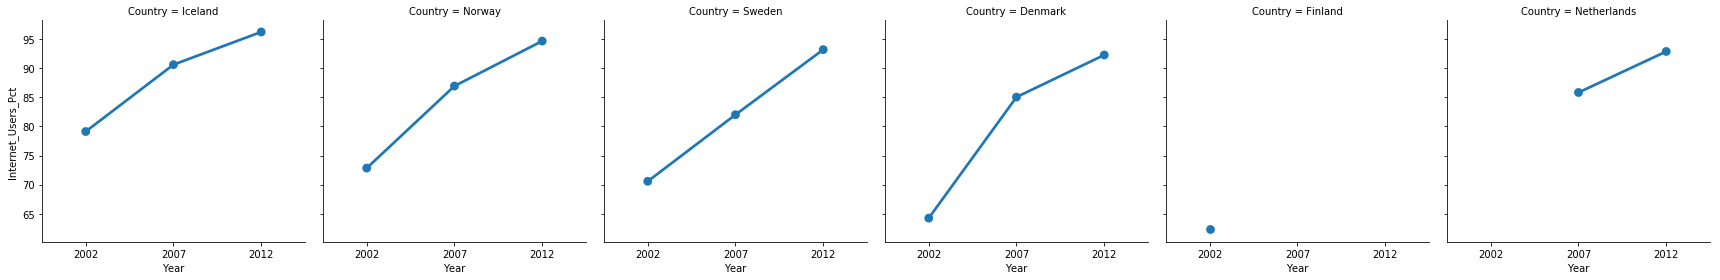

In [30]:
sns.factorplot(data=top_5_internet, x="Year", y="Internet_Users_Pct", col="Country")

In [31]:
df_bottom_2012 = (df_2012.sort_values(['Internet_Users_Pct'], ascending = True)).head(5)
df_bottom_2007 = (df_2007.sort_values(['Internet_Users_Pct'], ascending = True)).head(5)
df_bottom_2002 = (df_2002.sort_values(['Internet_Users_Pct'], ascending = True)).head(5)

df_bottom_5 = [df_bottom_2002, df_bottom_2007, df_bottom_2012]

In [32]:
bottom_5_internet = pd.concat(df_bottom_5)

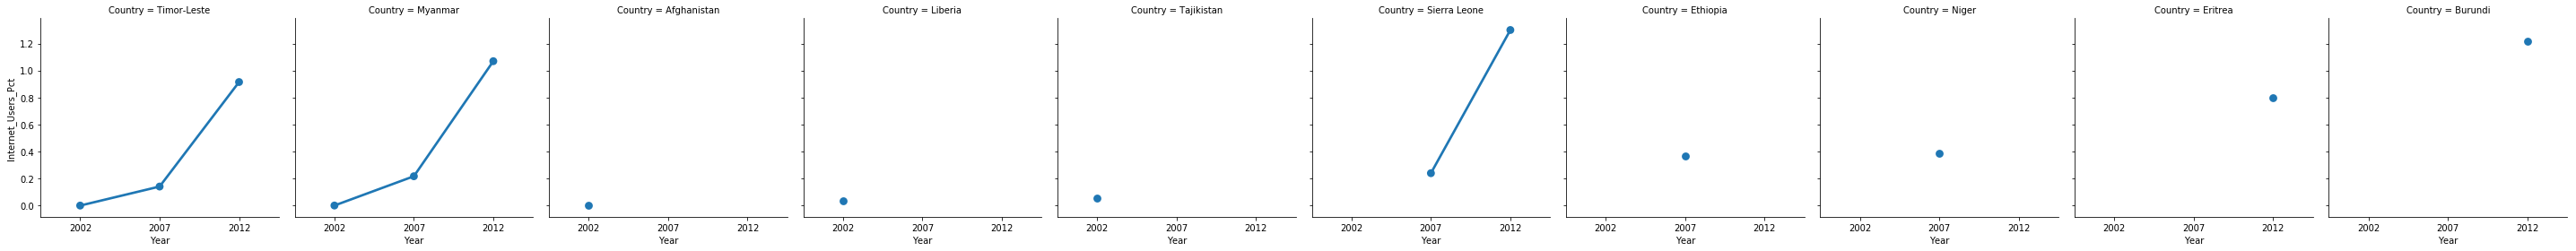

In [33]:
sns.factorplot(data=bottom_5_internet, x="Year", y="Internet_Users_Pct", col="Country")

In [34]:
df_top_net_2012 = (df_2012.sort_values(['Net_Migration'], ascending = False)).head(5)
df_top_net_2007 = (df_2007.sort_values(['Net_Migration'], ascending = False)).head(5)
df_top_net_2002 = (df_2002.sort_values(['Net_Migration'], ascending = False)).head(5)

df_top_net_5 = [df_top_net_2002, df_top_net_2007, df_top_net_2012]

In [35]:
top_5_net_migration = pd.concat(df_top_net_5)

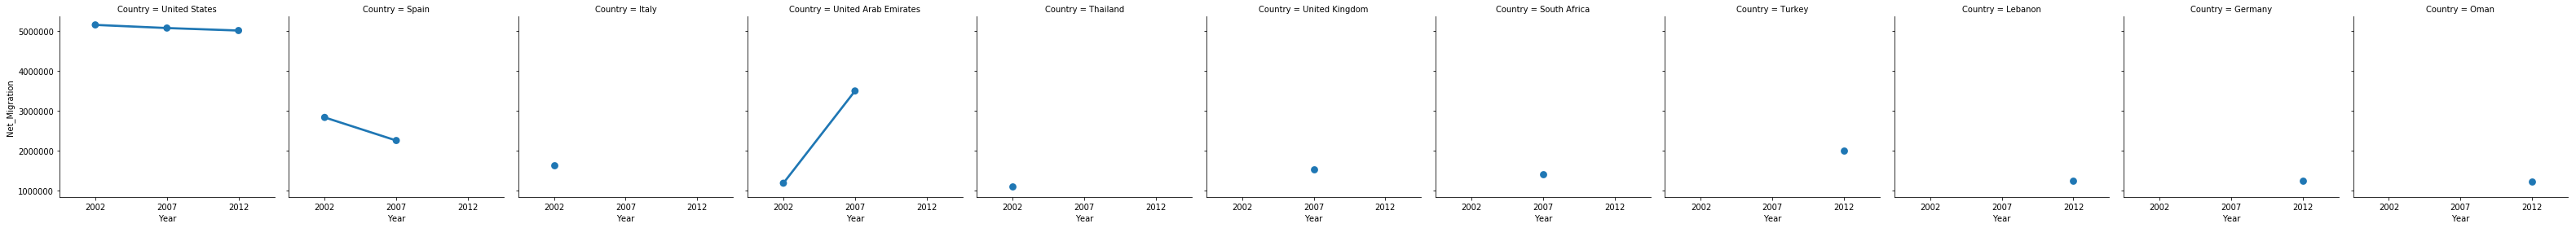

In [36]:
sns.factorplot(data=top_5_net_migration, x="Year", y="Net_Migration", col="Country")

In [37]:
df_bottom_net_2012 = (df_2012.sort_values(['Net_Migration'], ascending = True)).head(5)
df_bottom_net_2007 = (df_2007.sort_values(['Net_Migration'], ascending = True)).head(5)
df_bottom_net_2002 = (df_2002.sort_values(['Net_Migration'], ascending = True)).head(5)

df_bottom_net_5 = [df_bottom_net_2002, df_bottom_net_2007, df_bottom_net_2012]

In [38]:
bottom_5_net_migration = pd.concat(df_bottom_net_5)

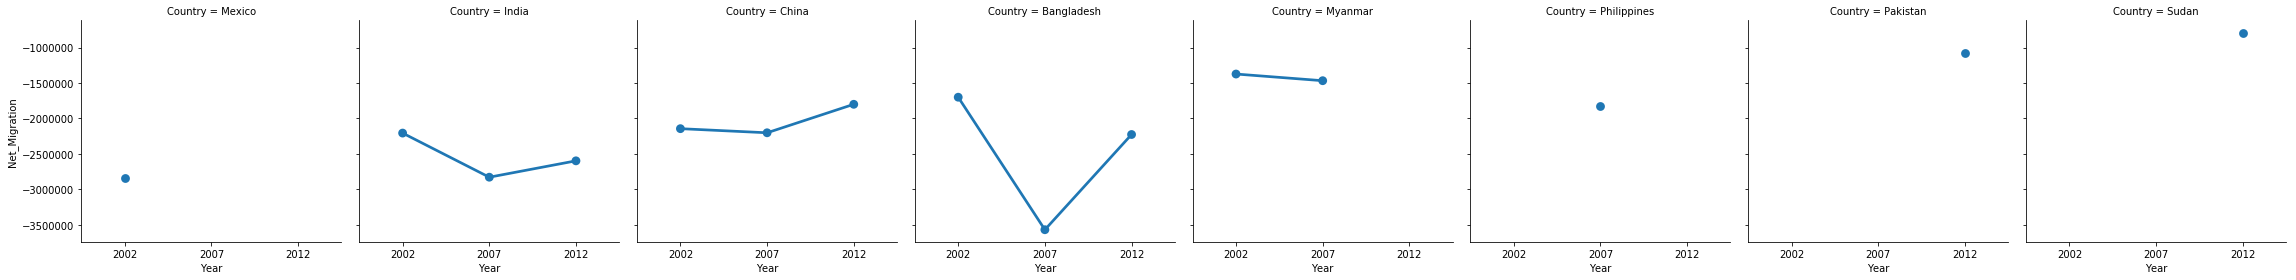

In [39]:
sns.factorplot(data=bottom_5_net_migration, x="Year", y="Net_Migration", col="Country")

>Next 4 lines - Grab the names of the bottom 5 in Net Migration from 2012, merge on Country, then create plot points.

In [40]:
df_dec_all = pd.concat(df_dec)
print(df_bottom_net_2012)

        Country  Year  Net_Migration  Internet_Users_Pct
299       India  2012       -2598218           12.580061
48   Bangladesh  2012       -2226481            5.000000
142       China  2012       -1800000           42.300117
488    Pakistan  2012       -1081918            9.960000
602       Sudan  2012        -800000           21.000000


In [41]:
df_bottom_net = df_bottom_net_2012.drop(df_bottom_net_2012.columns[1:], axis=1)
print(df_bottom_net)

        Country
299       India
48   Bangladesh
142       China
488    Pakistan
602       Sudan


In [42]:
bottom_net_decade = pd.merge(df_dec_all, df_bottom_net, on = 'Country')
print(bottom_net_decade)

       Country  Year  Net_Migration  Internet_Users_Pct
0   Bangladesh  2002       -1700003            0.139920
1   Bangladesh  2007       -3570954            1.800000
2   Bangladesh  2012       -2226481            5.000000
3        China  2002       -2144051            4.595704
4        China  2007       -2202103           16.000000
5        China  2012       -1800000           42.300117
6        India  2002       -2206411            1.537876
7        India  2007       -2829378            3.950000
8        India  2012       -2598218           12.580061
9     Pakistan  2002        -896486            2.577427
10    Pakistan  2007       -1296372            6.800000
11    Pakistan  2012       -1081918            9.960000
12       Sudan  2002        -430000            0.439478
13       Sudan  2007        -500000            8.660000
14       Sudan  2012        -800000           21.000000


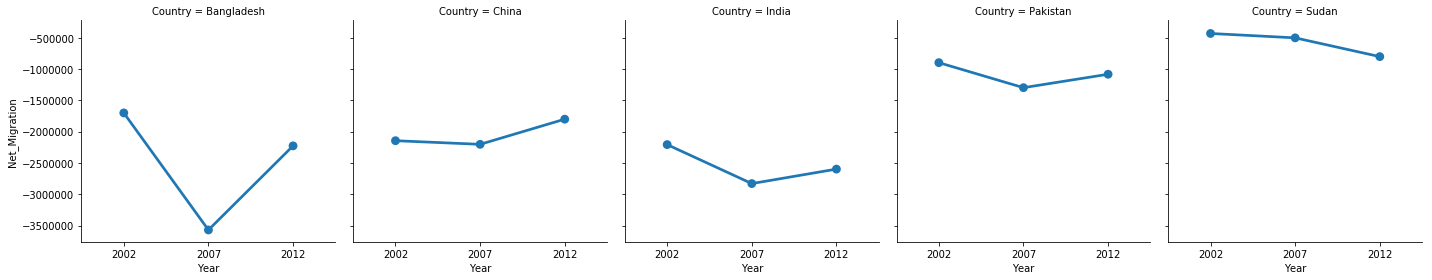

In [43]:
sns.factorplot(data=bottom_net_decade, x="Year", y="Net_Migration", col="Country")

>Next 4 lines - Grab the names of the top 5 in Net Migration from 2012, merge on Country, then create plot points.

In [44]:
df_dec_all = pd.concat(df_dec)
print(df_top_net_2012)

           Country  Year  Net_Migration  Internet_Users_Pct
686  United States  2012        5007887           79.300000
662         Turkey  2012        2000003           45.130000
358        Lebanon  2012        1250000           61.249786
241        Germany  2012        1249998           82.349998
484           Oman  2012        1211000           60.000000


In [45]:
df_top_net = df_top_net_2012.drop(df_top_net_2012.columns[1:], axis=1)
print(df_top_net)

           Country
686  United States
662         Turkey
358        Lebanon
241        Germany
484           Oman


In [46]:
top_net_decade = pd.merge(df_dec_all, df_top_net, on = 'Country')
print(top_net_decade)

          Country  Year  Net_Migration  Internet_Users_Pct
0         Germany  2002           1217           48.820000
1         Germany  2007          31640           75.160000
2         Germany  2012        1249998           82.349998
3         Lebanon  2002         550110            7.000000
4         Lebanon  2007         183370           18.740000
5         Lebanon  2012        1250000           61.249786
6            Oman  2002          40452            6.873396
7            Oman  2007         185500           16.680000
8            Oman  2012        1211000           60.000000
9          Turkey  2002        -100002           11.380000
10         Turkey  2007         -50000           28.630000
11         Turkey  2012        2000003           45.130000
12  United States  2002        5149157           58.785404
13  United States  2007        5070253           75.000000
14  United States  2012        5007887           79.300000


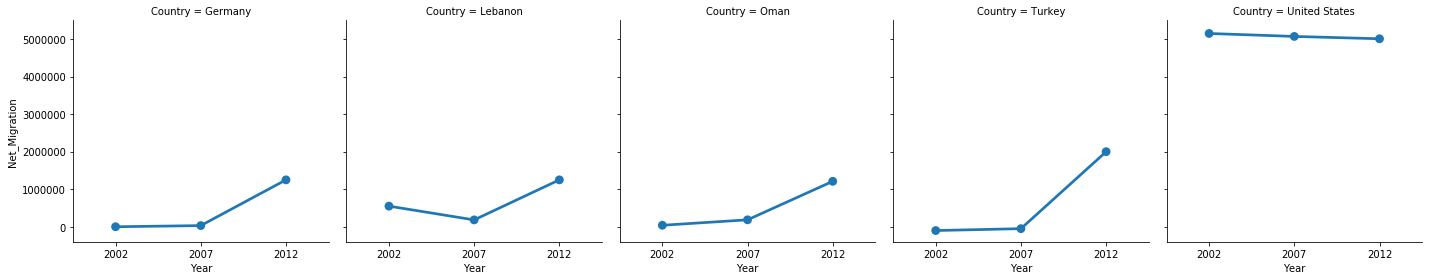

In [47]:
sns.factorplot(data=top_net_decade, x="Year", y="Net_Migration", col="Country")

>A few observations that peaked my interest:

    1) The minimum value of our dataset - Bengladesh (2007). The country had a political crisis from 2006-2008 that was captured by this data. The government was in a violent transitional period, which would lead to a rise in migration.
    
    2) Iceland has been purchasing connections to major internet lines since the late 80's, with first commercial internet services available in 1994. Iceland has been making the fastest internet connections available to their residents, with 75% of homes currently having access to a fiber connection.
    
    3) The UAE experienced a huge surge in net migration from 2002 to 2007, but then it doesn't appear in the top 5 for 2012 despite the expected trend. Up to 90% of the workforce in Dubai was filled by migrant workers, but the tourist-dependent nature of Dubai was decimated by the global recession that started in mid-2007. 

>I decided to add "Mobile Subscriptions per 100 people" data to my existing Net Migration/Internet Usage %. My intention is to test the hypothesis that countries with high internet usage would also have a high mobile subscription rate, especially with the prevelance of smartphones in the 2012 data.

In [48]:
mobile_use = pd.read_csv("/Users/Justin/Downloads/UNMobileData.csv")

In [49]:
del mobile_use['Value Footnotes']

In [50]:
mobile_use.columns = ['Country','Year','Mobile_Users_Per_100']

In [51]:
df_combined = pd.merge(df, mobile_use, on=['Country', 'Year'])

In [52]:
df_combined_2002 = df_combined.loc[(df_combined.Year == 2002)]
df_combined_2007 = df_combined.loc[(df_combined.Year == 2007)]
df_combined_2012 = df_combined.loc[(df_combined.Year == 2012)]

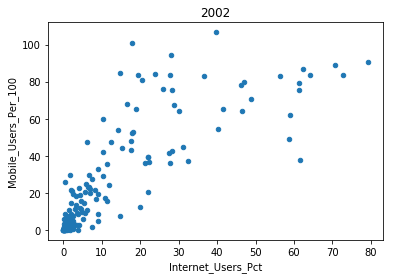

In [53]:
df_combined_2002.plot(kind = 'scatter', x = 'Internet_Users_Pct', y = 'Mobile_Users_Per_100', title = '2002')
plt.show()

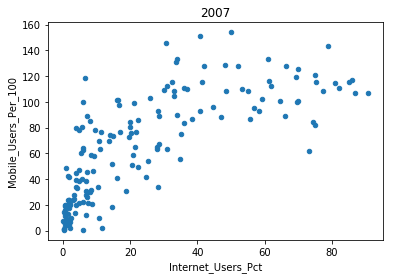

In [54]:
df_combined_2007.plot(kind = 'scatter', x = 'Internet_Users_Pct', y = 'Mobile_Users_Per_100', title = '2007')
plt.show()

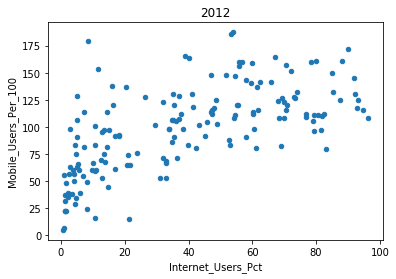

In [55]:
df_combined_2012.plot(kind = 'scatter', x = 'Internet_Users_Pct', y = 'Mobile_Users_Per_100', title = '2012')
plt.show()

>Comparing the data for 2002, 2007, and 2012 produced results similar to what I expected. The correlation between internet uers and mobile subscriptions is slightly less strong than I predicted, but there's still a positive correlation. The lack of clustering around the expected trend line is interesting. I hadn't considered that mobile and other types of internet access are reliant on different structures - mobile towers vs underground cabling.

In [56]:
df_top_mobile_2012 = (df_combined_2012.sort_values(['Mobile_Users_Per_100'], ascending = False)).head(5)
df_top_mobile_2007 = (df_combined_2007.sort_values(['Mobile_Users_Per_100'], ascending = False)).head(5)
df_top_mobile_2002 = (df_combined_2002.sort_values(['Mobile_Users_Per_100'], ascending = False)).head(5)

df_top_mobile_5 = [df_top_mobile_2002, df_top_mobile_2007, df_top_mobile_2012]

In [57]:
top_5_mobile = pd.concat(df_top_mobile_5)

>The presence of low-population countries in the top 5 for mobile subcribers makes sense, but the top 5 in 2012 was the largest surprise for me. Looking into Gabon and Maldives in 2012 along with UAE in 2007 leads me to believe that there might be a correlation between low-population countries with tourism economies and mobile subscriptions, which would require additional datasets.

In [58]:
print(top_5_mobile)

                  Country  Year  Net_Migration  Internet_Users_Pct  \
376            Luxembourg  2002          14473           39.840000   
316                Israel  2002         102935           17.764599   
321                 Italy  2002        1624300           28.040000   
294               Iceland  2002           3894           79.120000   
614                Sweden  2002         141723           70.570000   
371             Lithuania  2007        -141659           49.900000   
320                 Italy  2007        1006308           40.790000   
430            Montenegro  2007          -3108           30.800000   
375            Luxembourg  2007          42279           78.920000   
675  United Arab Emirates  2007        3493000           61.000000   
543          Saudi Arabia  2012         850000           54.000000   
337            Kazakhstan  2012         159807           53.315669   
233                 Gabon  2012           5000            8.616714   
219               Fi

In [59]:
df_bottom_mobile_2012 = (df_combined_2012.sort_values(['Mobile_Users_Per_100'], ascending = True)).head(5)
df_bottom_mobile_2007 = (df_combined_2007.sort_values(['Mobile_Users_Per_100'], ascending = True)).head(5)
df_bottom_mobile_2002 = (df_combined_2002.sort_values(['Mobile_Users_Per_100'], ascending = True)).head(5)

df_bottom_mobile_5 = [df_bottom_mobile_2002, df_bottom_mobile_2007, df_bottom_mobile_2012]

In [60]:
bottom_5_mobile = pd.concat(df_bottom_mobile_5)

In [61]:
print(bottom_5_mobile)

           Country  Year  Net_Migration  Internet_Users_Pct  \
204        Eritrea  2002         110001            0.227090   
275  Guinea-Bissau  2002         -30000            1.022993   
152        Comoros  2002         -10000            0.554870   
75          Bhutan  2002          34976            1.675803   
213       Ethiopia  2002         -83182            0.072402   
440        Myanmar  2007       -1466799            0.217128   
346       Kiribati  2007           -578            6.000000   
212       Ethiopia  2007         -50132            0.370000   
203        Eritrea  2007        -160001            0.410000   
168           Cuba  2007        -193998           11.690000   
202        Eritrea  2012        -160001            0.800000   
439        Myanmar  2012        -474278            1.069100   
167           Cuba  2012         -79999           21.200000   
345       Kiribati  2012          -2130           10.746798   
211       Ethiopia  2012         -60001            1.48

In [62]:
df_mobile_2012 = df_combined_2012['Mobile_Users_Per_100']

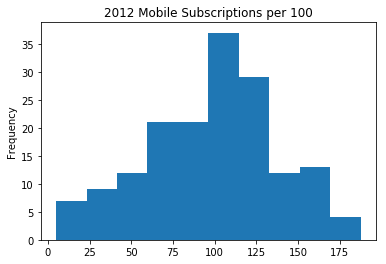

In [63]:
df_mobile_2012.plot(x = 'Mobile_Users_Per_100', kind = 'hist', title = '2012 Mobile Subscriptions per 100', bins=10)

In [64]:
df_mobile_2012.describe()

count    165.000000
mean      98.944102
std       39.648529
min        4.979398
25%       68.779020
50%      104.988609
75%      124.761817
max      187.359558
Name: Mobile_Users_Per_100, dtype: float64

>It's interesting to see the mode of mobile subscriptions to be slightly over 100 in 2012. When thinking about global mobile subscription rates, I would've predicted the mode below 100. The standard deviation is expectedly large, especially with min/max values of 4-187.

>Adding a bokeh scatter plot comparing showing the (lack of) correlation between the number of mobile subscriptions per 100 and the Internet Users  %.

In [65]:
import bokeh as bk
from bokeh.plotting import figure, output_file, show

In [66]:
p = figure(title = 'Cell Subscription and Internet Users Correlation', title_location = 'above', plot_width=800, plot_height=800)

In [67]:
p.triangle(df_combined_2012.Internet_Users_Pct, df_combined_2012.Mobile_Users_Per_100, size=10, color="olive", alpha=0.5)
p.xaxis[0].axis_label = 'Internet Users %'
p.yaxis[0].axis_label = 'Mobile Subscriptions per 100'
show(p)